In [67]:
# Importing all relevant libraries i need for my model
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

In [68]:
# Let's import data
data = pd.read_csv('Loan Prediction.csv')

In [69]:
# Lets have a look at the data first

data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban,NaN,NaN,NaN,NaN,NaN
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban,NaN,NaN,NaN,Row Labels,Count of LoanAmount
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban,NaN,NaN,NaN,0,58
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban,NaN,NaN,NaN,1,275
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban,NaN,NaN,NaN,(blank),29


As we can see there is both categorical and continous column which decides the loan amount.
And we are here to biuld a linear regression model, we are going to use Applicant income and Co applicant income are independetn variables nas see how the loan amount varies with it.

In [70]:
# Lets see some basic stats of data frame

data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Unnamed: 12,Unnamed: 13,Unnamed: 14
count,367.000000,367.000000,362.000000,361.000000,338.000000,0.0,0.0,0.0
mean,4805.599455,1569.577657,136.132597,342.537396,0.825444,NaN,NaN,NaN
std,4910.685399,2334.232099,61.366652,65.156643,0.380150,NaN,NaN,NaN
min,0.000000,0.000000,28.000000,6.000000,0.000000,NaN,NaN,NaN
25%,2864.000000,0.000000,100.250000,360.000000,1.000000,NaN,NaN,NaN
50%,3786.000000,1025.000000,125.000000,360.000000,1.000000,NaN,NaN,NaN
75%,5060.000000,2430.500000,158.000000,360.000000,1.000000,NaN,NaN,NaN
max,72529.000000,24000.000000,550.000000,480.000000,1.000000,NaN,NaN,NaN


In [71]:
# As count is different for different columns. 
#Check for any missing values in Applicant, coapplicant and Loan amount income

print('Miising values in Applicant Income:' , data['ApplicantIncome'].isnull().sum())
print('Miising values in Coapplicant Income:' , data['CoapplicantIncome'].isnull().sum())
print('Miising values in Loan Amount:' , data['LoanAmount'].isnull().sum())



Miising values in Applicant Income: 0
Miising values in Coapplicant Income: 0
Miising values in Loan Amount: 5


So we have 5 missing values in the Loan Amount Column. Let see how material it is for our model. First let check the total number of rows.

In [72]:
data.shape

(367, 17)

Since only 5 rows are have a missing value. We can drop these from our entires. Mind you this is one off approach. Other approach could be fitting this with mean if there is no outlier. Or fitting it with median if there is outlier.
Which remind me of looking at the outliers.

<AxesSubplot:title={'center':'ApplicantIncome'}, xlabel='[Education]'>

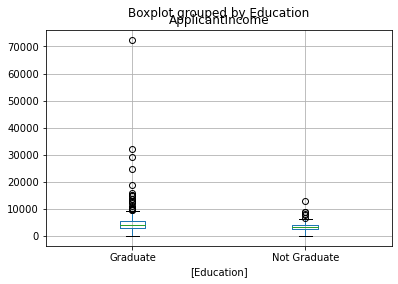

In [73]:
# Lets look at the outliers
data.boxplot(column = ['ApplicantIncome'], by = ['Education'])

In [25]:
# Yes, we can say there is some outlier but since it is in educated sections we can 't remove this from our data

In [26]:
# Lets remove rows with missing values

In [74]:
data2 = data.dropna(subset=['LoanAmount'])

In [33]:
# Lets check how new data looks

data2.shape
data2.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Unnamed: 12,Unnamed: 13,Unnamed: 14
count,362.000000,362.000000,362.000000,356.000000,333.000000,0.0,0.0,0.0
mean,4769.513812,1569.011050,136.132597,341.955056,0.825826,NaN,NaN,NaN
std,4911.744038,2338.842716,61.366652,65.178050,0.379830,NaN,NaN,NaN
min,0.000000,0.000000,28.000000,6.000000,0.000000,NaN,NaN,NaN
25%,2862.000000,0.000000,100.250000,360.000000,1.000000,NaN,NaN,NaN
50%,3785.500000,1054.000000,125.000000,360.000000,1.000000,NaN,NaN,NaN
75%,5030.750000,2416.750000,158.000000,360.000000,1.000000,NaN,NaN,NaN
max,72529.000000,24000.000000,550.000000,480.000000,1.000000,NaN,NaN,NaN


In [75]:
#So no mising now in three coulms which we are going to use further.

In [168]:
# Let's define our variables.

x1 = np.array(data2['ApplicantIncome']).reshape(-1,1)
y = np.array(data2['LoanAmount']).reshape(-1,1)

In [169]:
print(x1.shape)
print(y.shape)

x1.reshape(-1,1)
y.reshape(-1,1)

print(x1.shape)
print(y.shape)


(362, 1)
(362, 1)
(362, 1)
(362, 1)


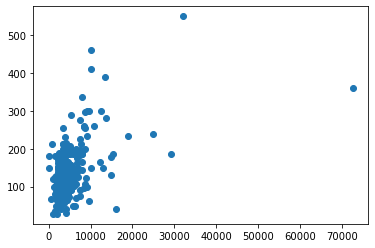

In [170]:
# Let drwa a scatter plot
plt.scatter(x1,y)


In [171]:
# Not getting anything clearfrom the plot.Let quickly jump to the model building
# Adding constant
x1 =sm.add_constant(x1)
model = sm.OLS(y,x1)

result = model.fit()

result.summary()


# That's all we need to make a linear regression model

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.243
Model:                            OLS   Adj. R-squared:                  0.241
Method:                 Least Squares   F-statistic:                     115.9
Date:                Sun, 21 Feb 2021   Prob (F-statistic):           1.30e-23
Time:                        18:20:26   Log-Likelihood:                -1953.0
No. Observations:                 362   AIC:                             3910.
Df Residuals:                     360   BIC:                             3918.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        106.7281      3.918     27.238      0.000      99.022     114.434
x1             0.0062      0.001     10.764      0.000       0.005       0.007
==============================================================================
Omnibus:                      112.347   Durbin-Watson:                   1.836
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              511.817
Skew:                           1.255   Prob(JB):                    7.25e-112
Kurtosis:                       8.257   Cond. No.                     9.54e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.54e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [176]:
# Now let's add coapplicant into the regression model and see how the model works
X  = data2[['ApplicantIncome','CoapplicantIncome'] ]
print(X.shape)

(362, 2)


In [177]:
Y = np.array(data2['LoanAmount'])

print(Y.shape)

(362,)


In [178]:
# Multi linear correlation
X = sm.add_constant(X)
model = sm.OLS(Y,X).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.286
Model:                            OLS   Adj. R-squared:                  0.282
Method:                 Least Squares   F-statistic:                     71.83
Date:                Sun, 21 Feb 2021   Prob (F-statistic):           5.75e-27
Time:                        18:28:05   Log-Likelihood:                -1942.5
No. Observations:                 362   AIC:                             3891.
Df Residuals:                     359   BIC:                             3903.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                96.8680      4.371     22.162      0.000      88.272     105.464
ApplicantIncome       0.0064      0.001     11.499      0.000       0.005       0.008
CoapplicantIncome     0.0054      0.001      4.612      0.000       0.003       0.008
==============================================================================
Omnibus:                       87.539   Durbin-Watson:                   1.883
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              395.286
Skew:                           0.950   Prob(JB):                     1.46e-86
Kurtosis:                       7.753   Cond. No.                     1.11e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.11e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""